# 📄 LayoutLMv3 + PaddleOCR (vi) Contract Extraction Demo

**Sử dụng OCR tiếng Việt chuẩn `PP-OCRv4`** với `PaddleOCR`, không cần `pytesseract` hoặc `poppler`.

In [1]:
# ✅ Cài đặt thư viện cần thiết
!pip install paddleocr pymupdf --upgrade --quiet
!pip install opencv-python --quiet

In [2]:
import fitz  # PyMuPDF
from paddleocr import PaddleOCR
from collections import defaultdict
import os
from PIL import Image

In [3]:
ocr = PaddleOCR(use_angle_cls=True, lang='vi', ocr_version='PP-OCRv4')

[2025/05/01 23:41:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\doman/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\doman/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

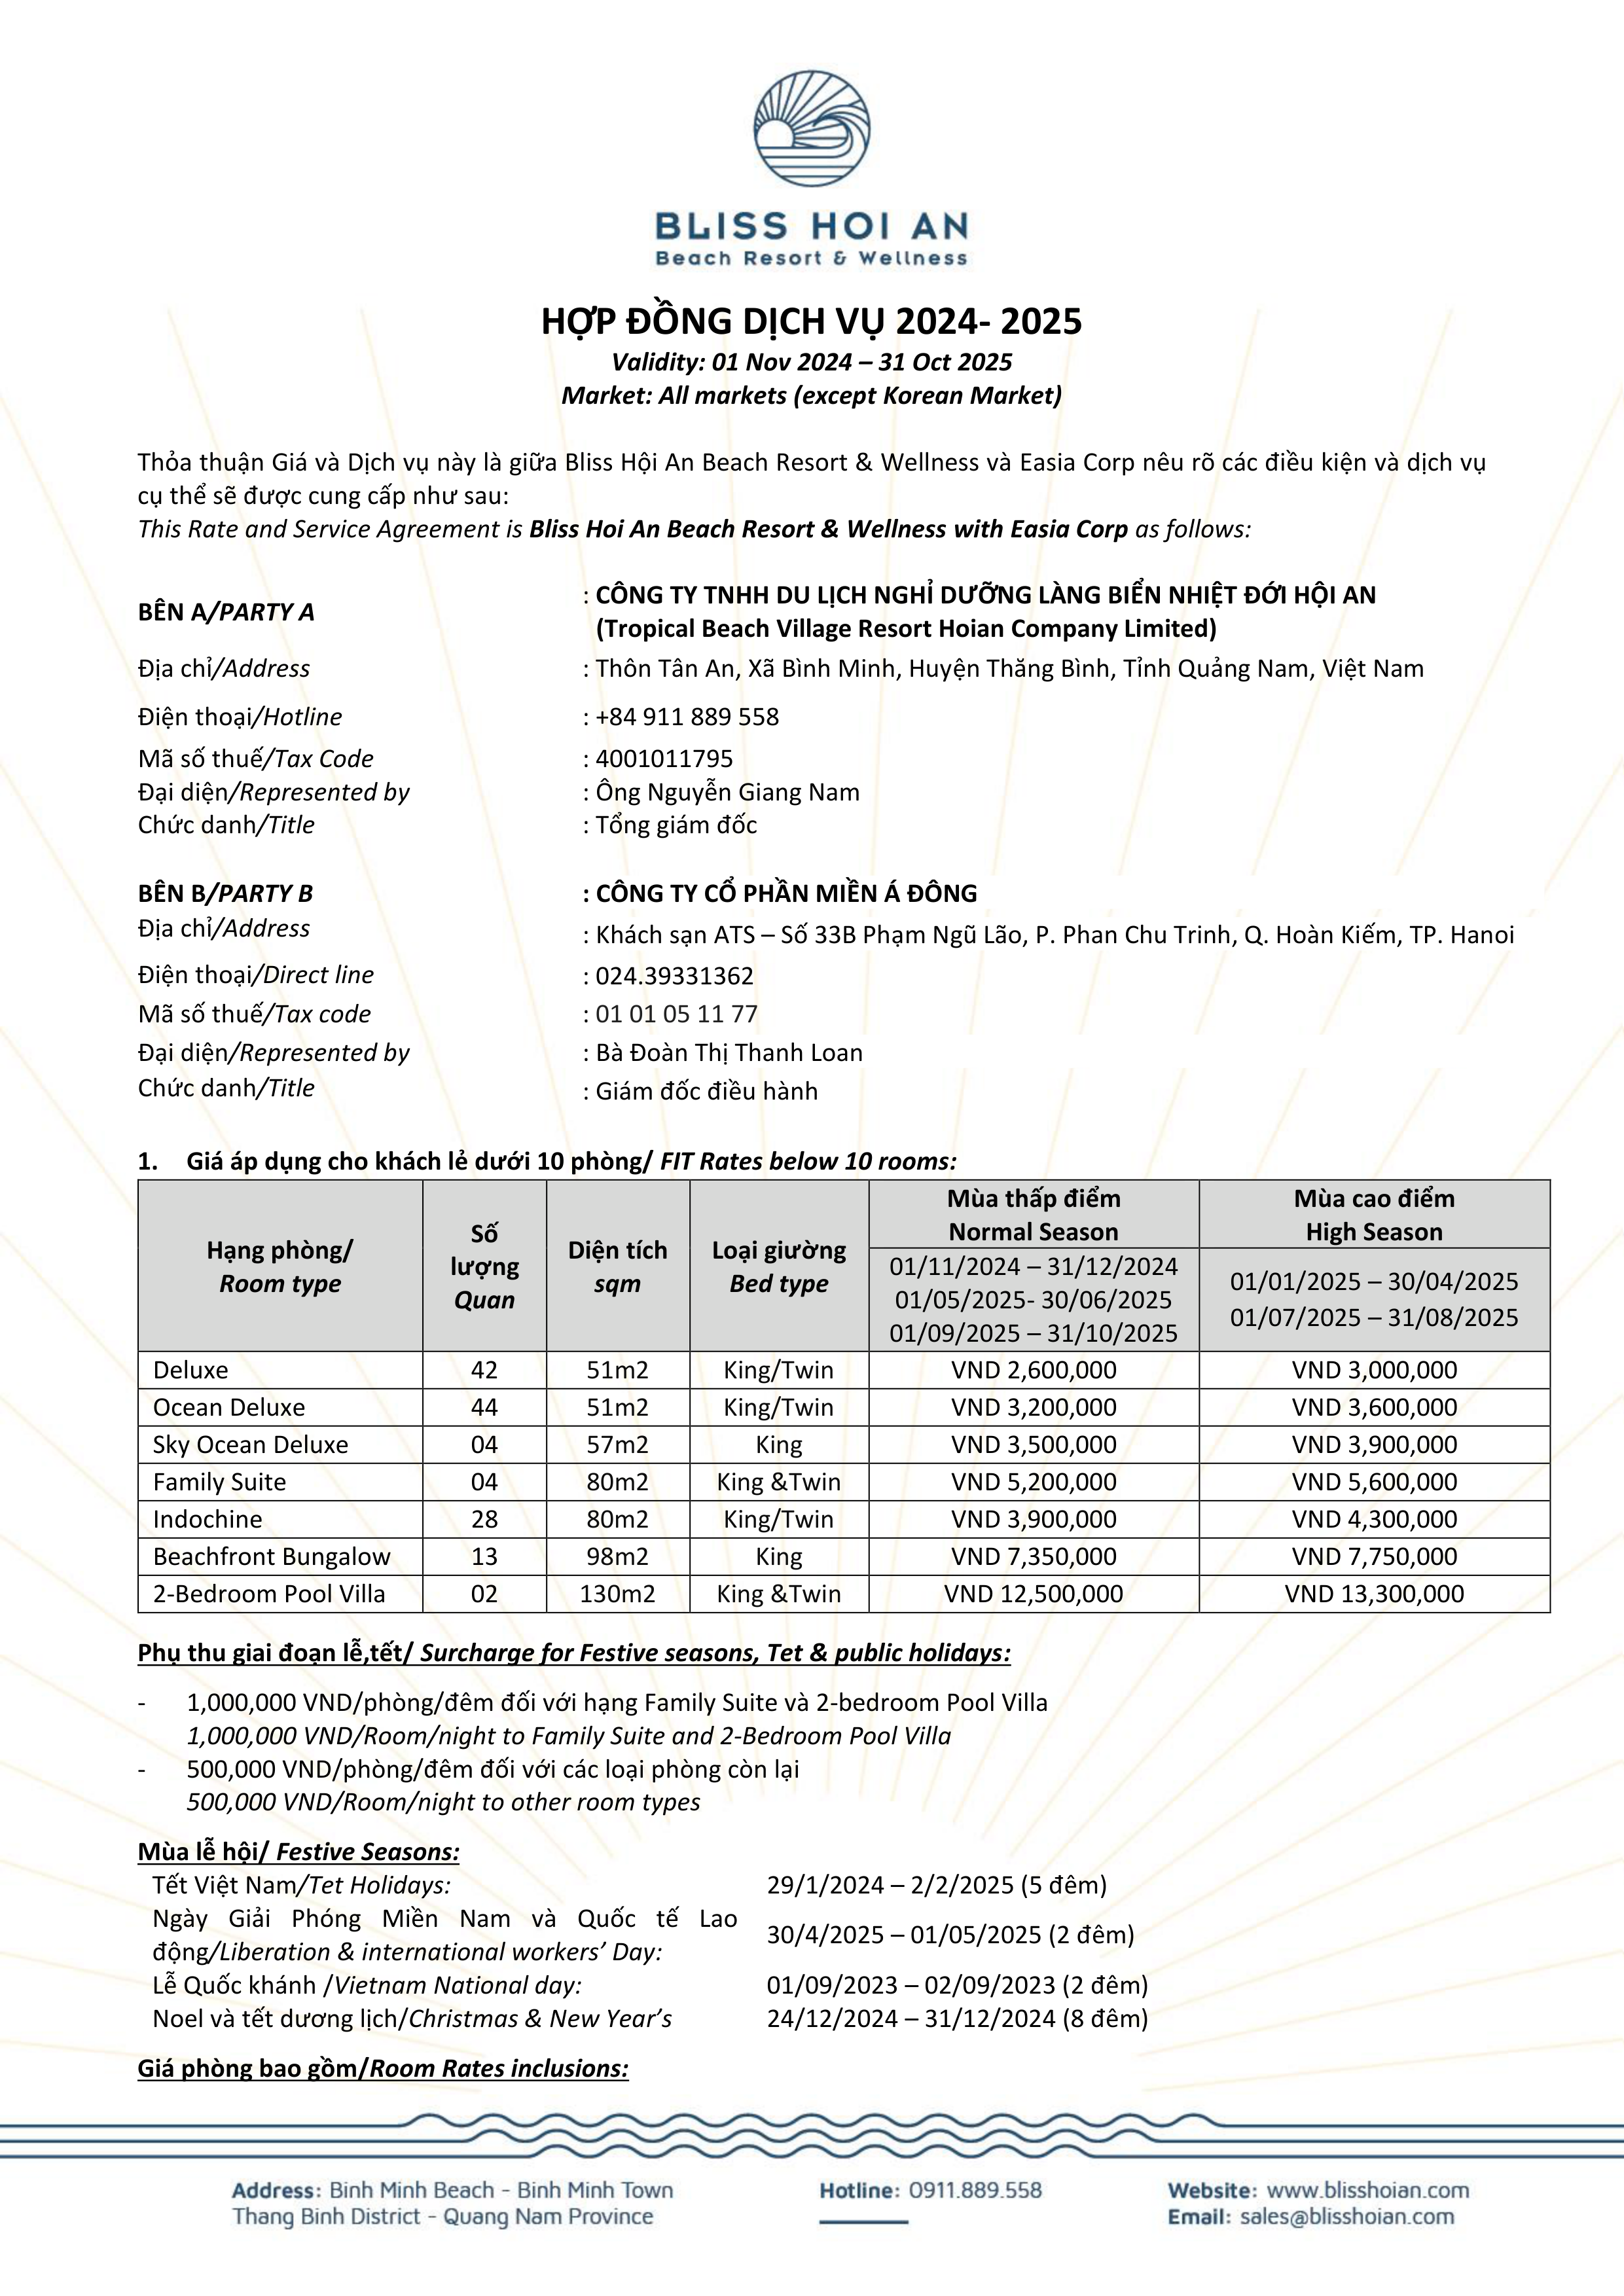

In [4]:
def pdf_to_images(pdf_path, output_dir="images"):
    os.makedirs(output_dir, exist_ok=True)
    doc = fitz.open(pdf_path)
    image_paths = []
    for i, page in enumerate(doc):
        pix = page.get_pixmap(dpi=300)
        img_path = os.path.join(output_dir, f"page_{i}.png")
        pix.save(img_path)
        image_paths.append(img_path)
    return image_paths

images = pdf_to_images("../store/input/your_contract_file.pdf")
Image.open(images[0])

In [5]:
def ocr_image(image_path):
    result = ocr.ocr(image_path)
    lines = []
    for line in result[0]:
        text = line[1][0]
        y_center = int((line[0][0][1] + line[0][2][1]) / 2)
        lines.append((y_center, text))
    return lines

def group_lines_by_row(lines, y_tolerance=10):
    rows = defaultdict(list)
    for y, text in lines:
        found = False
        for row_y in rows:
            if abs(row_y - y) <= y_tolerance:
                rows[row_y].append(text)
                found = True
                break
        if not found:
            rows[y].append(text)
    return [rows[y] for y in sorted(rows)]

lines = ocr_image(images[0])
rows = group_lines_by_row(lines)
for r in rows:
    print(r)

[2025/05/01 23:42:15] ppocr DEBUG: dt_boxes num : 116, elapsed : 0.4958221912384033
[2025/05/01 23:42:16] ppocr DEBUG: cls num  : 116, elapsed : 1.0910861492156982
[2025/05/01 23:42:36] ppocr DEBUG: rec_res num  : 116, elapsed : 19.6001136302948
['BLISS HOI AN']
['Beach Resort & wellness']
["HQ'P DNG DICH VU 2024- 2025"]
['Validitv: 01 Nov 2024 - 31 Oct 2025']
['Market: All markets (except Korean Market)']
['Thöa thuan Giá vá Dich vu náy lá gira Bliss Hi An Beach Resort & Wellness vá Easia Corp néu r các diéu kién vá dich vu']
['cu thé se dugc cung cäp nhu sau:']
['This Rate and Service Agreement is Bliss Hoi An Beach Resort & Wellness with Easia Corp as follows:']
[": CNG TY TNHH DU LICH NGHi DU''NG LANG BIÉN NHIET óI HI AN"]
['BEN A/PARTY A']
['(Tropical Beach Village Resort Hoian Company Limited)']
['Dia chi/Address', ' : Thn Tän An, Xa Binh Minh, Huyén Thäng Binh, Tinh Quäng Nam, Viét Nam']
['Dién thoai/Hotline', ': +84 911 889 558']
['Ma sö thué/Tax Code', ': 4001011795']
['ai dié